In [17]:
# get BTC dataset
import requests
import datetime
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pprint import pprint
%matplotlib
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 6)

Nyears = 2
year = datetime.datetime.now().year

# to YYYY-MM-DD
def toYYYY_MM_DD(s):
    return s[6:] +'-'+ s[3:5] +'-'+ s[:2]

BTCdata = []
for _ in range(Nyears):

    headers = {
        'accept': 'application/json',
    }

    params = (
        ('coin', 'ethereum'),
        ('period', str(year)),
        ('format', 'array'),
    )

    res = requests.get('https://coinmarketcap.northpole.ro/history.json', headers=headers, params=params)
    print(res.text[:100] + '...')
    dic = json.loads(res.text)
    temp = list(  map(lambda x: {'price': x['price']['usd'], 'change24h': x['change24h'], 'marketCap': x['marketCap']['usd'], 'availableSupply': x['availableSupply'], 'volume24': x['volume24']['usd'], 'date': toYYYY_MM_DD(x['date'])}, dic['history']) )
    BTCdata = temp + BTCdata
    year -= 1

print('one sample')
print(dic['history'][0])
print('BTCdata head')
print(BTCdata[0])
print('BTCdata last')
print(BTCdata[-1])


Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib
{"symbol":"ETH","history":[{"position":2,"name":"Ethereum","symbol":"ETH","category":"currency","mar...
{"symbol":"ETH","history":[{"position":2,"name":"Ethereum","symbol":"ETH","category":"currency","mar...
one sample
{'position': 2, 'name': 'Ethereum', 'symbol': 'ETH', 'category': 'currency', 'marketCap': {'usd': 620519240.545, 'btc': 1470646.11199, 'eur': 544317616.2483523, 'cny': 4011459565.0049314, 'gbp': 439281703.8820597, 'cad': 805863373.541867, 'rub': 41640588976.78238, 'hkd': 4814013088.917731, 'jpy': 67058273287.21706, 'aud': 821596018.366645}, 'price': {'usd': 7.86055, 'btc': 0.0186297, 'eur': 6.89525087835, 'cny': 50.8159560951, 'gbp': 5.5646877193, 'cad': 10.208433400599999, 'rub': 527.4903827219999, 'hkd': 60.982461322, 'jpy': 849.4739174, 'aud': 10.407729785299999}, 'availableSupply': 78940944, 'volume24': {'usd': 31578021.352215443, 'btc': 74840.7, 'eur': 27700145.596082002,

In [22]:
# To pandas
tempData = []
keys = list(BTCdata[0].keys())
for i in range(len(BTCdata)):
    row = [BTCdata[i][key] for key in keys]
    tempData.append(row)

tempData = np.array(tempData)
BTCdf = pd.DataFrame(tempData, index=tempData[:,4], columns=keys)

# to float
keys.remove('date')
BTCdf[keys] = BTCdf[keys].astype(float)

# info
BTCdf.info()
pprint(BTCdf.head())
BTCdf.tail()



<class 'pandas.core.frame.DataFrame'>
Index: 574 entries, 31578021.352215443 to 1110048287.8386948
Data columns (total 6 columns):
price              574 non-null float64
change24h          574 non-null float64
marketCap          574 non-null float64
availableSupply    574 non-null float64
volume24           574 non-null float64
date               574 non-null object
dtypes: float64(5), object(1)
memory usage: 31.4+ KB
                      price  change24h     marketCap  availableSupply  \
31578021.352215443  7.86055     -18.44  6.205192e+08       78940944.0   
40968147.81539945   8.78170      -5.89  6.933298e+08       78951666.0   
16879930.29212023   8.71842      -0.80  6.886059e+08       78982872.0   
22526844.872260462  7.57155     -12.60  5.982579e+08       79013933.0   
31751589.39759395   8.31934      10.16  6.576073e+08       79045612.0   

                        volume24        date  
31578021.352215443  3.157802e+07  2016-04-10  
40968147.81539945   4.096815e+07  2016-04-11

,price,change24h,marketCap,availableSupply,volume24,date
894867603.8181865,318.699,2.61,3.047631e+10,95627243.0,8.948676e+08,2017-11-10
891323294.498161,302.477,-5.60,2.893122e+10,95647673.0,8.913233e+08,2017-11-11
849389975.9090044,316.409,5.12,3.027024e+10,95668083.0,8.493900e+08,2017-11-12
1570642414.8469503,307.102,-2.76,2.938604e+10,95688198.0,1.570642e+09,2017-11-13
1110048287.8386948,316.307,2.63,3.027332e+10,95708671.0,1.110048e+09,2017-11-14


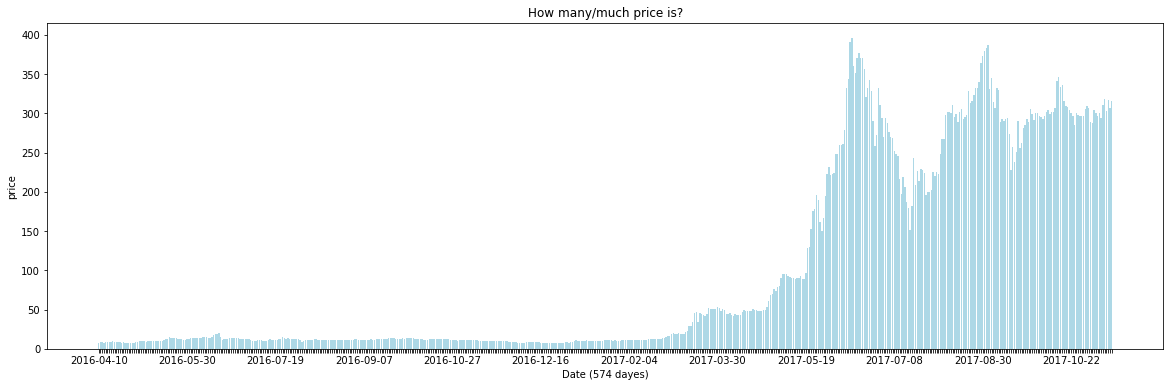

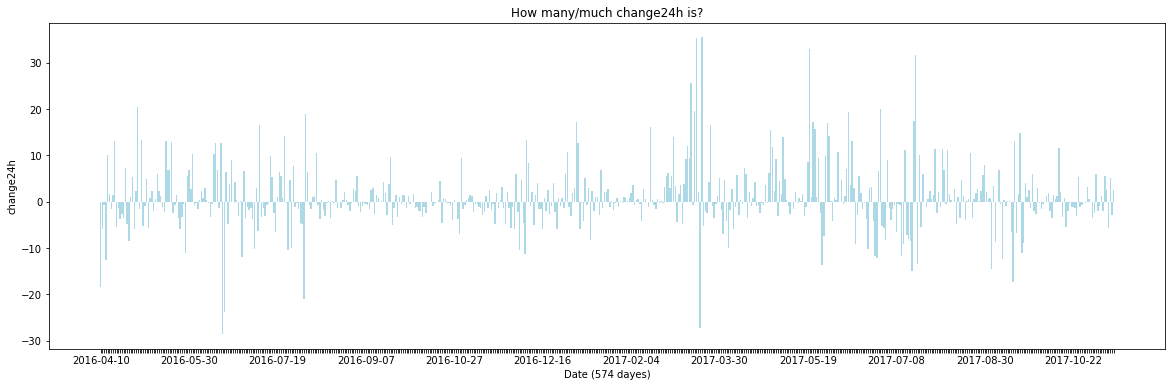

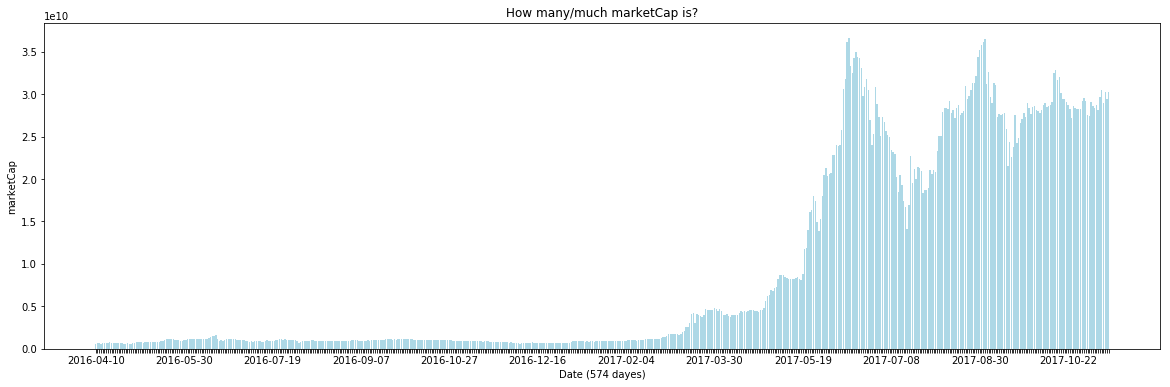

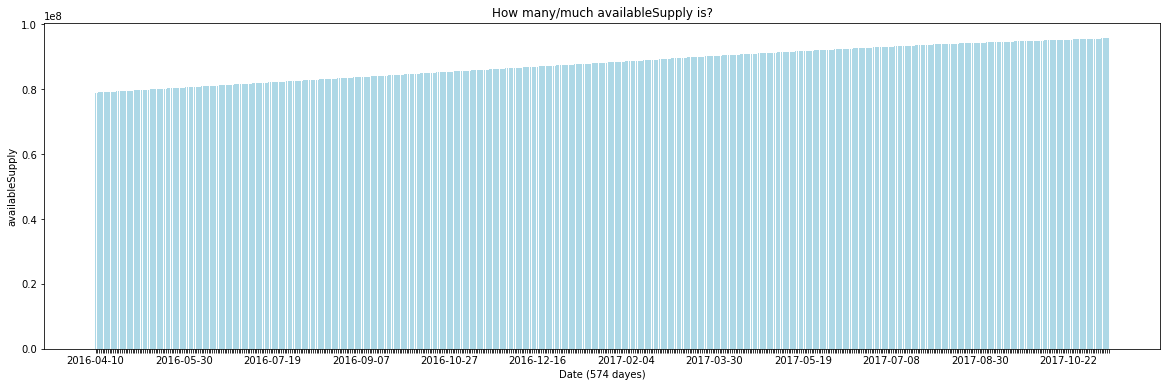

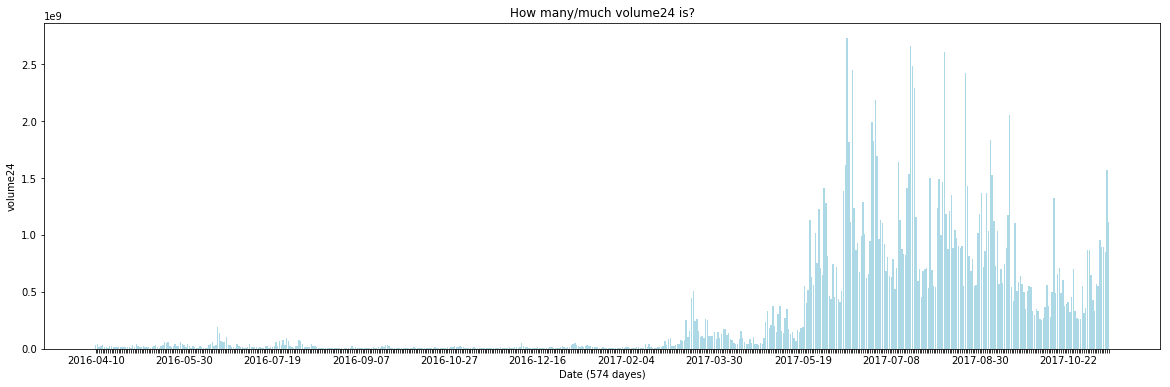

In [23]:
# plot all attrs

for attr in BTCdf.columns[:-1]:
    # Plot BTC price
    fig, ax = plt.subplots()
    dates = BTCdf['date'].tolist() 
    numbers = BTCdf[attr].tolist() 

    y_pos = np.arange(len(dates))
    ax.bar(y_pos, numbers, align='center', color='lightblue', ecolor='black')
    labels = [date if i%50==0 else '' for i, date in enumerate(dates)]
    ax.set_xticks(np.arange(len(labels)))
    ax.set_xticklabels(labels)

    ax.set_xlabel('Date ('+str(len(dates))+ ' dayes)')
    ax.set_ylabel(attr)
    ax.set_title('How many/much ' + attr + ' is?')
    plt.show()
    